## Las redes neuronales multicapa MLPs, pueden ser usadas tanto para realizar predicciónes como clasificaciones. 

*   Para un problema de clasificación binaria solo se necesita una neurona de salida. 

*   Para un problema con un número de etiquetas definido, se puede establecer una neurona de salida para cada una de ellas. En el ejemplo del clasificador de emails, una neurona podría identificar si el email es spam o no, y de forma simultanea, otra neurona podría identificar si el email es urgente o no. 

---



## Implementación de **MLP_s** Utilizando [Keras](https://keras.io)

Keras es una API de aprendizaje profundo de alto nivel que permite construir, entrenar, evaluar y ejecutar fácilmente todo tipo de redes neuronales. Su documentación (o especificación) está disponible en https://keras.io.


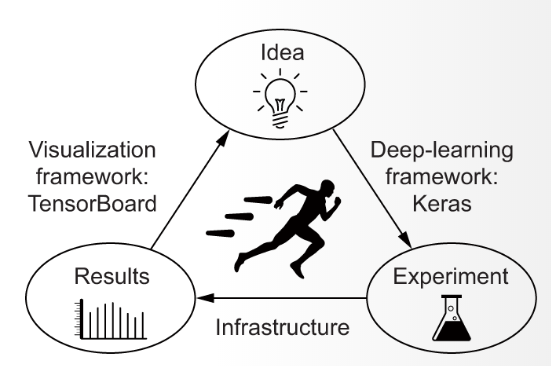


Para realizar los cálculos requeridos por las redes neuronales, el equipo Keras se basa en un backend de cálculo. En la actualidad, puede elegir entre tres populares bibliotecas de código abierto de aprendizaje profundo: **TensorFlow**, Microsoft Cognitive Toolkit (CNTK) o Theano. TensorFlow ahora viene empaquetado con su propia implementación Keras llamada tf.keras. 


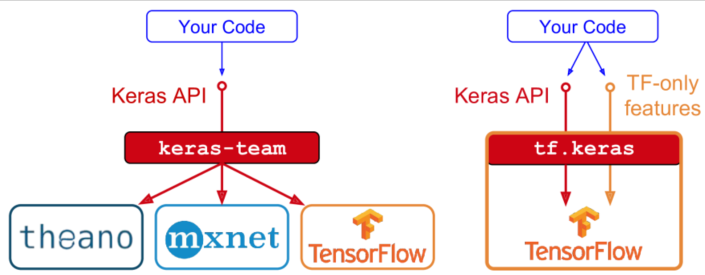






## En este ejemplo crearemos un **clasificador de imagenes**

**Paso 1.** Importar las librerías necesarias para implementación. 

In [2]:
import tensorflow as tf
from tensorflow import keras
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Versión TensorFlow: " + str(tf.__version__))
print("Versión Keras: " + str(keras.__version__))

Versión TensorFlow: 2.7.0
Versión Keras: 2.7.0


**Paso 2.** Cargar el dataset. Se utilizará el Fashion MNIST, que es el reemplazo del dataset utilizado en el clasificador lógistico de escritura a mano. El dataset contiene la misma cantidad de imagenes y tiene el mismo formato que el dataset anterior. (70,000 imagenes en escala de grises de 28x28 pixeles cada una, organizadas en 10 clases).

* Se utiliza keras para cargar el dataset. 
* Se realiza la separación del batch para entrenamiento y testeo, dejando 60,000 imagenes en escala de griste de de 28x28 pixeles para el set de entrenamiento. 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
# Cada pixel es representado como un byte (0 a 255):
X_train_full.dtype

dtype('uint8')

### Tratamiento de los datos
Se Divide el conjunto de entrenamiento completo en un subconjunto de validación y un subconjunto de entrenamiento (más pequeño). También se escala la intensidad de los píxeles en el rango de 0-1 y se convierten en flotantes, dividiéndolos por 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

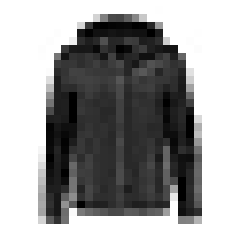

In [7]:
# se puede graficar una imagen utilizando matplotlib
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


#### Las etiquetas son los IDs de las clases, representados de 0 a 9. 

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
# nombres de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# La primera imagen en el set de entrenamiento es una Coat. 
class_names[y_train[0]]

'Coat'


El set de validación contiene 5,000 imagenes, y el set de test contiene 10,000 imagenes:

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

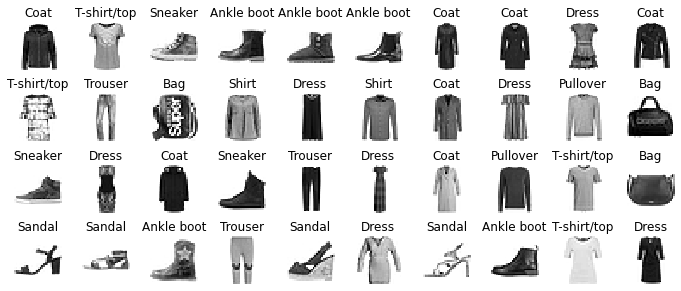

In [12]:
#Imagenes del dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

**Paso 3.** Creación del modelo. 

Creamos una red para clasificación MLP con dos capas ocultas. 

Descripción de las siguientes líneas de código. 

1.   En la primera línea se crea un modelo secuencial. Este es el modelo mas sencillo de Keras y se utiliza para una red neuronal en donde las capas se conectan de manera secuencial. 

2.   En la segunda línea se crea la capa de entrada y se agrega al modelo. la función de la capa Flatten (Aplanadora) es convertir la matrix de cada imagen en un vector de una dimensión 1D. Se debe definir las dimensiónes de la matriz de entrada. 

3.   En la tercera línea se crea una capa oculta con 300 neuronas. Se utiliza la función de activación ReLU. Cada capa oculta maneja su propia matriz de pesos, contemplando todas las conexiones entre los pesos y entradas por cada neurona. Adicionalmente contiene el vector con los terminos de bias. 

4.   En la cuarta línea de agrega una segunda capa oculta con 100 neuronas, esta capa tambien utiliza la función de activación ReLU. 

5.   Finalmente, se utiliza una capa de salida con 10 neuronas (una por clase), usando la función de activación **softmax** debido a que las clases son exclusivas. 





In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### El código descrito previamente se puede realizar como se describe a continuación. 

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


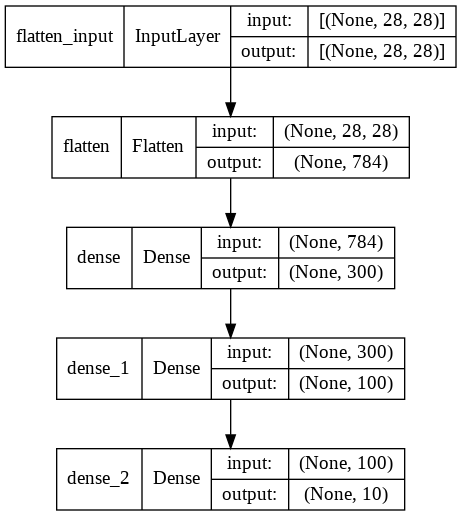

In [18]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### Es posible obtener la información de las diferentes capaz, modificar sus valores, obtener los pesos y bias... 

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

**Paso 4.** Compilando el modelo y entrenando el modelo. 

Despues de que el modelo es creado es necesario compilarlo. en el modelo se deben definir metricas que permitan calcular la perdida(error) y definir la función de optimización. 



*   **loss**: "sparse_categorical_crossentropy", se utiliza está función dado que se cuenta con un número de etiquetas escasas (sparse) - no binarias. (Binarias: categorical_crossentropy)
*   **optimizer** = Stochastic Gradient Descent (SGD) - Aplicación de backpropagation. 
*   **metrics**: dado que el modelo se utiliza para clasificar la información, se utiliza la exactitud del modelo durante el entrenamiento y la evaluación. 

Para realizar el entrenamiento se utiliza el metodo fit(). Se utilizan los datos separados para el entrenamiento (X_train, y_train), así como el número de epocas a entrenar. De forma opcional se pasa el set de validación. 

Keras medirá el valor de perdida (loss) y las metricas definidas previamente, si el desempeño con el set de entrenamiento es mucho mejor que con el set de validación, probablemente se esté presentando overfitting del set de entrenamiento.

validation_split=0.1: Indica que kera usa el ultimo 10% para validación. 




In [26]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [32]:
#history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), verbose=True)
history = model.fit(X_train, y_train, epochs=30,validation_split=0.1, verbose=True) 

Epoch 1/30
1547/1547 [==============================] - 6s 4ms/step - loss: 0.1593 - accuracy: 0.9433 - val_loss: 0.1753 - val_accuracy: 0.9344
Epoch 2/30
1547/1547 [==============================] - 5s 4ms/step - loss: 0.1565 - accuracy: 0.9446 - val_loss: 0.1690 - val_accuracy: 0.9360
Epoch 3/30
1547/1547 [==============================] - 7s 4ms/step - loss: 0.1540 - accuracy: 0.9453 - val_loss: 0.1674 - val_accuracy: 0.9420
Epoch 4/30
1547/1547 [==============================] - 5s 4ms/step - loss: 0.1516 - accuracy: 0.9463 - val_loss: 0.1629 - val_accuracy: 0.9413
Epoch 5/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.1491 - accuracy: 0.9484 - val_loss: 0.1801 - val_accuracy: 0.9338
Epoch 6/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.1475 - accuracy: 0.9480 - val_loss: 0.1779 - val_accuracy: 0.9327
Epoch 7/30
1547/1547 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9502 - val_loss: 0.1677 - val_accuracy:

In [33]:
history.params

{'epochs': 30, 'steps': 1547, 'verbose': True}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

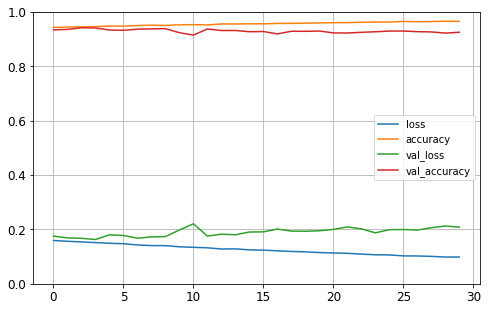

In [35]:
# se utiliza pandas para visualizar la información almacenada en el diccionario de historia de entrenamiento y graficarla. 
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Paso 5.** Evaluación del modelo. 

* Loss = Perdida (0.33)
* Accuracy = Exactitud (aprox=88.77%)

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3705 - accuracy: 0.8892


[0.37054434418678284, 0.88919997215271]

**Paso 6.** Usando el modelo para hacer predicciones. 

Se toman tres instancias del set de prueba para hacer la predicción. y se imprime la matriz de probabilidad para cada una de las instancias. 

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
classes_x = np.argmax(y_proba,axis=1)

In [52]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [53]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

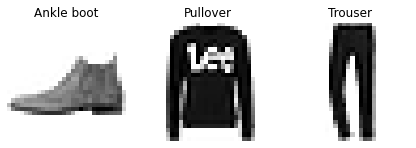

In [54]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()